# Explatory Data Analysis

In [1]:
# Loading Necessary Libraries for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
File_path = r"C:\Users\USER\10 Academy\AlphaCare-Insurance-Risk-Analytics-Predictive-Modeling-End-to-End-\data\raw\MachineLearningRating_v3.txt"
Insurance_df=pd.read_csv(File_path, sep="|")

C:\Users\USER\AppData\Local\Temp\ipykernel_13216\1414345271.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  Insurance_df=pd.read_csv(File_path, sep="|")


In [2]:
#Overview of the dataset
print(Insurance_df.head())
print(Insurance_df.describe())
print(Insurance_df.dtypes)
# Check for missing values
print(Insurance_df.isnull().sum())

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [3]:
# Convert 'TransactionMonth' to datetime format
Insurance_df['TransactionMonth']= pd.to_datetime(Insurance_df['TransactionMonth'])
 # Convert 'CapitalOutstanding' to numerical figure
Insurance_df['CapitalOutstanding'] = pd.to_numeric(Insurance_df['CapitalOutstanding'], errors='coerce')


In [4]:
#Handling Missing Values
missing_values = 0.75* len(Insurance_df)
Insurance_df.dropna(thresh=missing_values, inplace=True,axis=1)
Insurance_df.dropna(inplace=True)
#Convert 'Date' column to datetime format
Insurance_df['TransactionMonth']=pd.to_datetime(Insurance_df['TransactionMonth'], errors='coerce')
#Setting 'TransactionMonth' as index
Insurance_df.set_index('TransactionMonth',inplace=True)
# Check for missing values again
print(Insurance_df.isnull().sum())
Insurance_df.shape

UnderwrittenCoverID         0
PolicyID                    0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured                  0
TermFreque

(715888, 45)

In [5]:
#Identify unique values in categorical columns
for col in Insurance_df.columns:
    if Insurance_df[col].dtype== 'object':
        print(Insurance_df[col].unique())
        print(Insurance_df[col].value_counts())

['  ' 'AF' 'ZA' 'ZW']
Citizenship
      665375
ZA     49989
ZW       392
AF       132
Name: count, dtype: int64
['Close Corporation' 'Individual' 'Partnership' 'Private company'
 'Public company' 'Sole proprieter']
LegalType
Individual           657213
Private company       56281
Close Corporation      1315
Public company          861
Partnership             198
Sole proprieter          20
Name: count, dtype: int64
['Mr' 'Dr' 'Miss' 'Mrs' 'Ms']
Title
Mr      675142
Mrs      30510
Ms        8232
Miss      1842
Dr         162
Name: count, dtype: int64
['English']
Language
English    715888
Name: count, dtype: int64
['First National Bank' 'Standard Bank' 'ABSA Bank' 'Capitec Bank'
 'Nedbank' 'FirstRand Bank' 'Investec Bank' 'Ithala Bank' 'Old Mutual'
 'Mercantile Lisbon Bank' 'RMB Private Bank']
Bank
First National Bank       229460
ABSA Bank                 170078
Standard Bank             151345
Nedbank                   107196
Capitec Bank               49118
RMB Private Bank          

In [6]:
#Remove leading and trailing spaces and convert to lowercase
for col in Insurance_df.columns:
    if Insurance_df[col].dtype=='object' :
        Insurance_df[col]=Insurance_df[col].str.strip()
        Insurance_df[col]=Insurance_df[col].str.lower()

In [7]:
#Unique Values for Each Column
for col in Insurance_df.columns:
    if Insurance_df[col].dtype== 'object':
        print(f"\nUnique values in '{col}':")
        print(Insurance_df[col].unique())



Unique values in 'Citizenship':
['' 'af' 'za' 'zw']

Unique values in 'LegalType':
['close corporation' 'individual' 'partnership' 'private company'
 'public company' 'sole proprieter']

Unique values in 'Title':
['mr' 'dr' 'miss' 'mrs' 'ms']

Unique values in 'Language':
['english']

Unique values in 'Bank':
['first national bank' 'standard bank' 'absa bank' 'capitec bank'
 'nedbank' 'firstrand bank' 'investec bank' 'ithala bank' 'old mutual'
 'mercantile lisbon bank' 'rmb private bank']

Unique values in 'AccountType':
['current account' 'savings account' 'transmission account']

Unique values in 'MaritalStatus':
['not specified' 'married' 'single']

Unique values in 'Gender':
['not specified' 'male' 'female']

Unique values in 'Country':
['south africa']

Unique values in 'Province':
['gauteng' 'kwazulu-natal' 'limpopo' 'eastern cape' 'north west'
 'western cape' 'free state' 'mpumalanga' 'northern cape']

Unique values in 'MainCrestaZone':
['rand east' 'transvaal (all except preto

In [8]:
#Convert 'VehicleIntroDate' to datetime format
Insurance_df['VehicleIntroDate'] = pd.to_datetime(Insurance_df['VehicleIntroDate'], errors='coerce')
for col in Insurance_df.columns:
    if Insurance_df[col].dtype == 'object':
        Insurance_df[col] = Insurance_df[col].str.strip().str.lower()   

C:\Users\USER\AppData\Local\Temp\ipykernel_13216\1232091042.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Insurance_df['VehicleIntroDate'] = pd.to_datetime(Insurance_df['VehicleIntroDate'], errors='coerce')


In [9]:
#Sustaining Uniform naming
replacement_CoverCategory={'basic excess waiver (2015)': 'basic excess waiver','windscreen (2015)': 'windscreen','income protector (2015)': 'income protector',
                           'own damage.':'own damage'}
replacement_ExcessSelected={'mobility - windscreen (feb2015)':'mobility - windscreen',
                        'mobility - taxi with value more than r100 000 - r5 000 (april)':'mobility - taxi with value more than r100 000 - r5 000'}
Insurance_df['CoverCategory'] = Insurance_df['CoverCategory'].replace(replacement_CoverCategory)
Insurance_df['ExcessSelected'] = Insurance_df['ExcessSelected'].replace(replacement_ExcessSelected)


In [34]:
import os
output_dir = r"C:\Users\USER\10 Academy\AlphaCare-Insurance-Risk-Analytics-Predictive-Modeling-End-to-End-\data\processed"
if not os.path.exists(output_dir):  
    os.makedirs(output_dir)     
# Save the cleaned DataFrame to a new CSV file
output_file_path = os.path.join(output_dir, "cleaned_insurance_data.csv")
Insurance_df.to_csv(output_file_path, index=True)

In [10]:
#Separation of columns into categorical and numerical
categorical_columns = Insurance_df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = Insurance_df.select_dtypes(include=['number']).columns.tolist()

**Distribution Analysis**

*Categorical*

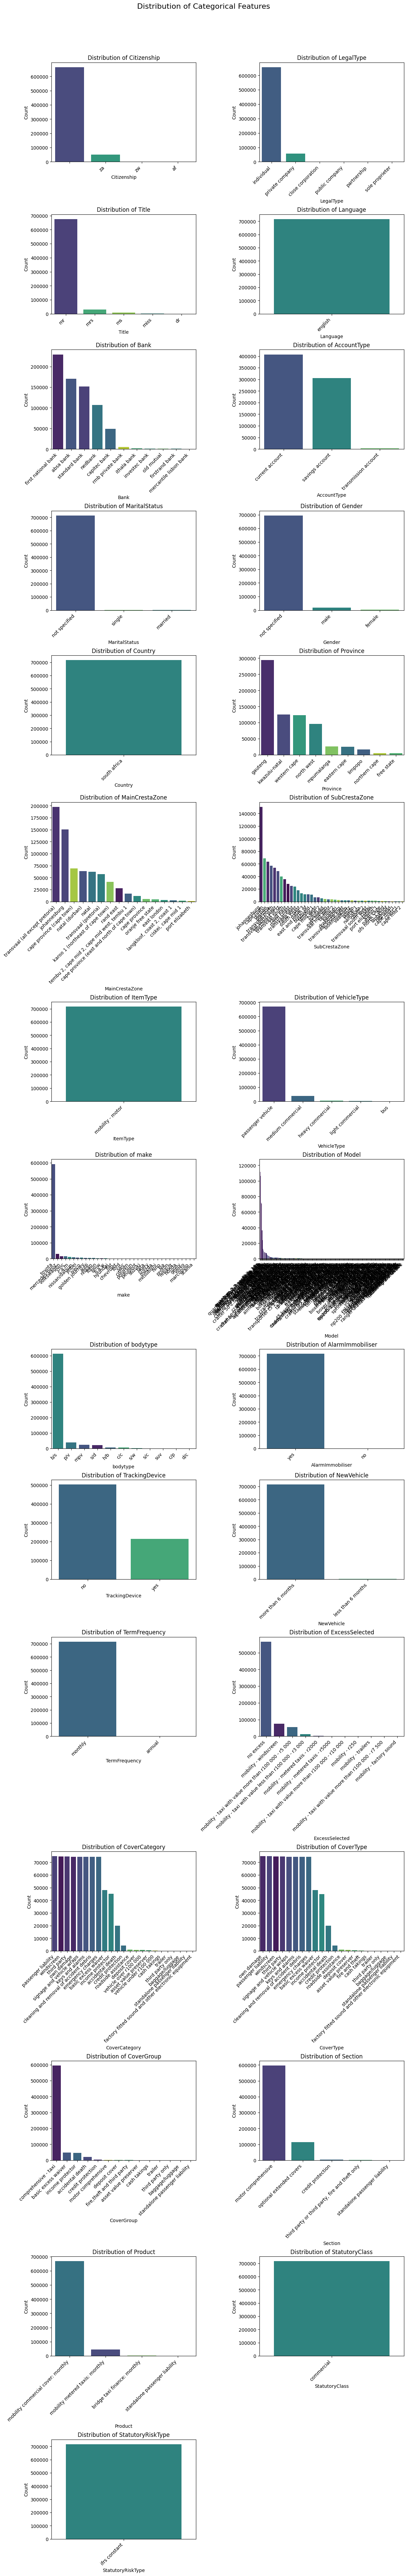

In [16]:
import math
num_cols_per_row = 2
num_plots = len(categorical_columns)
num_rows = math.ceil(num_plots / num_cols_per_row)

# Create the figure and a grid of subplots (axes)
fig, axes = plt.subplots(num_rows, num_cols_per_row,
                         figsize=(num_cols_per_row * 6, num_rows * 5),
                         constrained_layout=True)

if num_rows == 1 and num_cols_per_row == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Iterate through each categorical column and plot on a respective axis
for i, col in enumerate(categorical_columns):
    current_ax = axes[i]
    category_order = Insurance_df[col].value_counts().index

    sns.countplot(x=col, data=Insurance_df, ax=current_ax, palette='viridis',
                  order=category_order,
                  hue=col, legend=False)

    current_ax.set_xlabel(col)
    current_ax.set_ylabel('Count')
    current_ax.set_title(f'Distribution of {col}')
    current_ax.set_xticks(range(len(category_order))) 
    current_ax.set_xticklabels(category_order, rotation=45, ha='right')
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)
plt.show()

Generating numerical distribution plots...


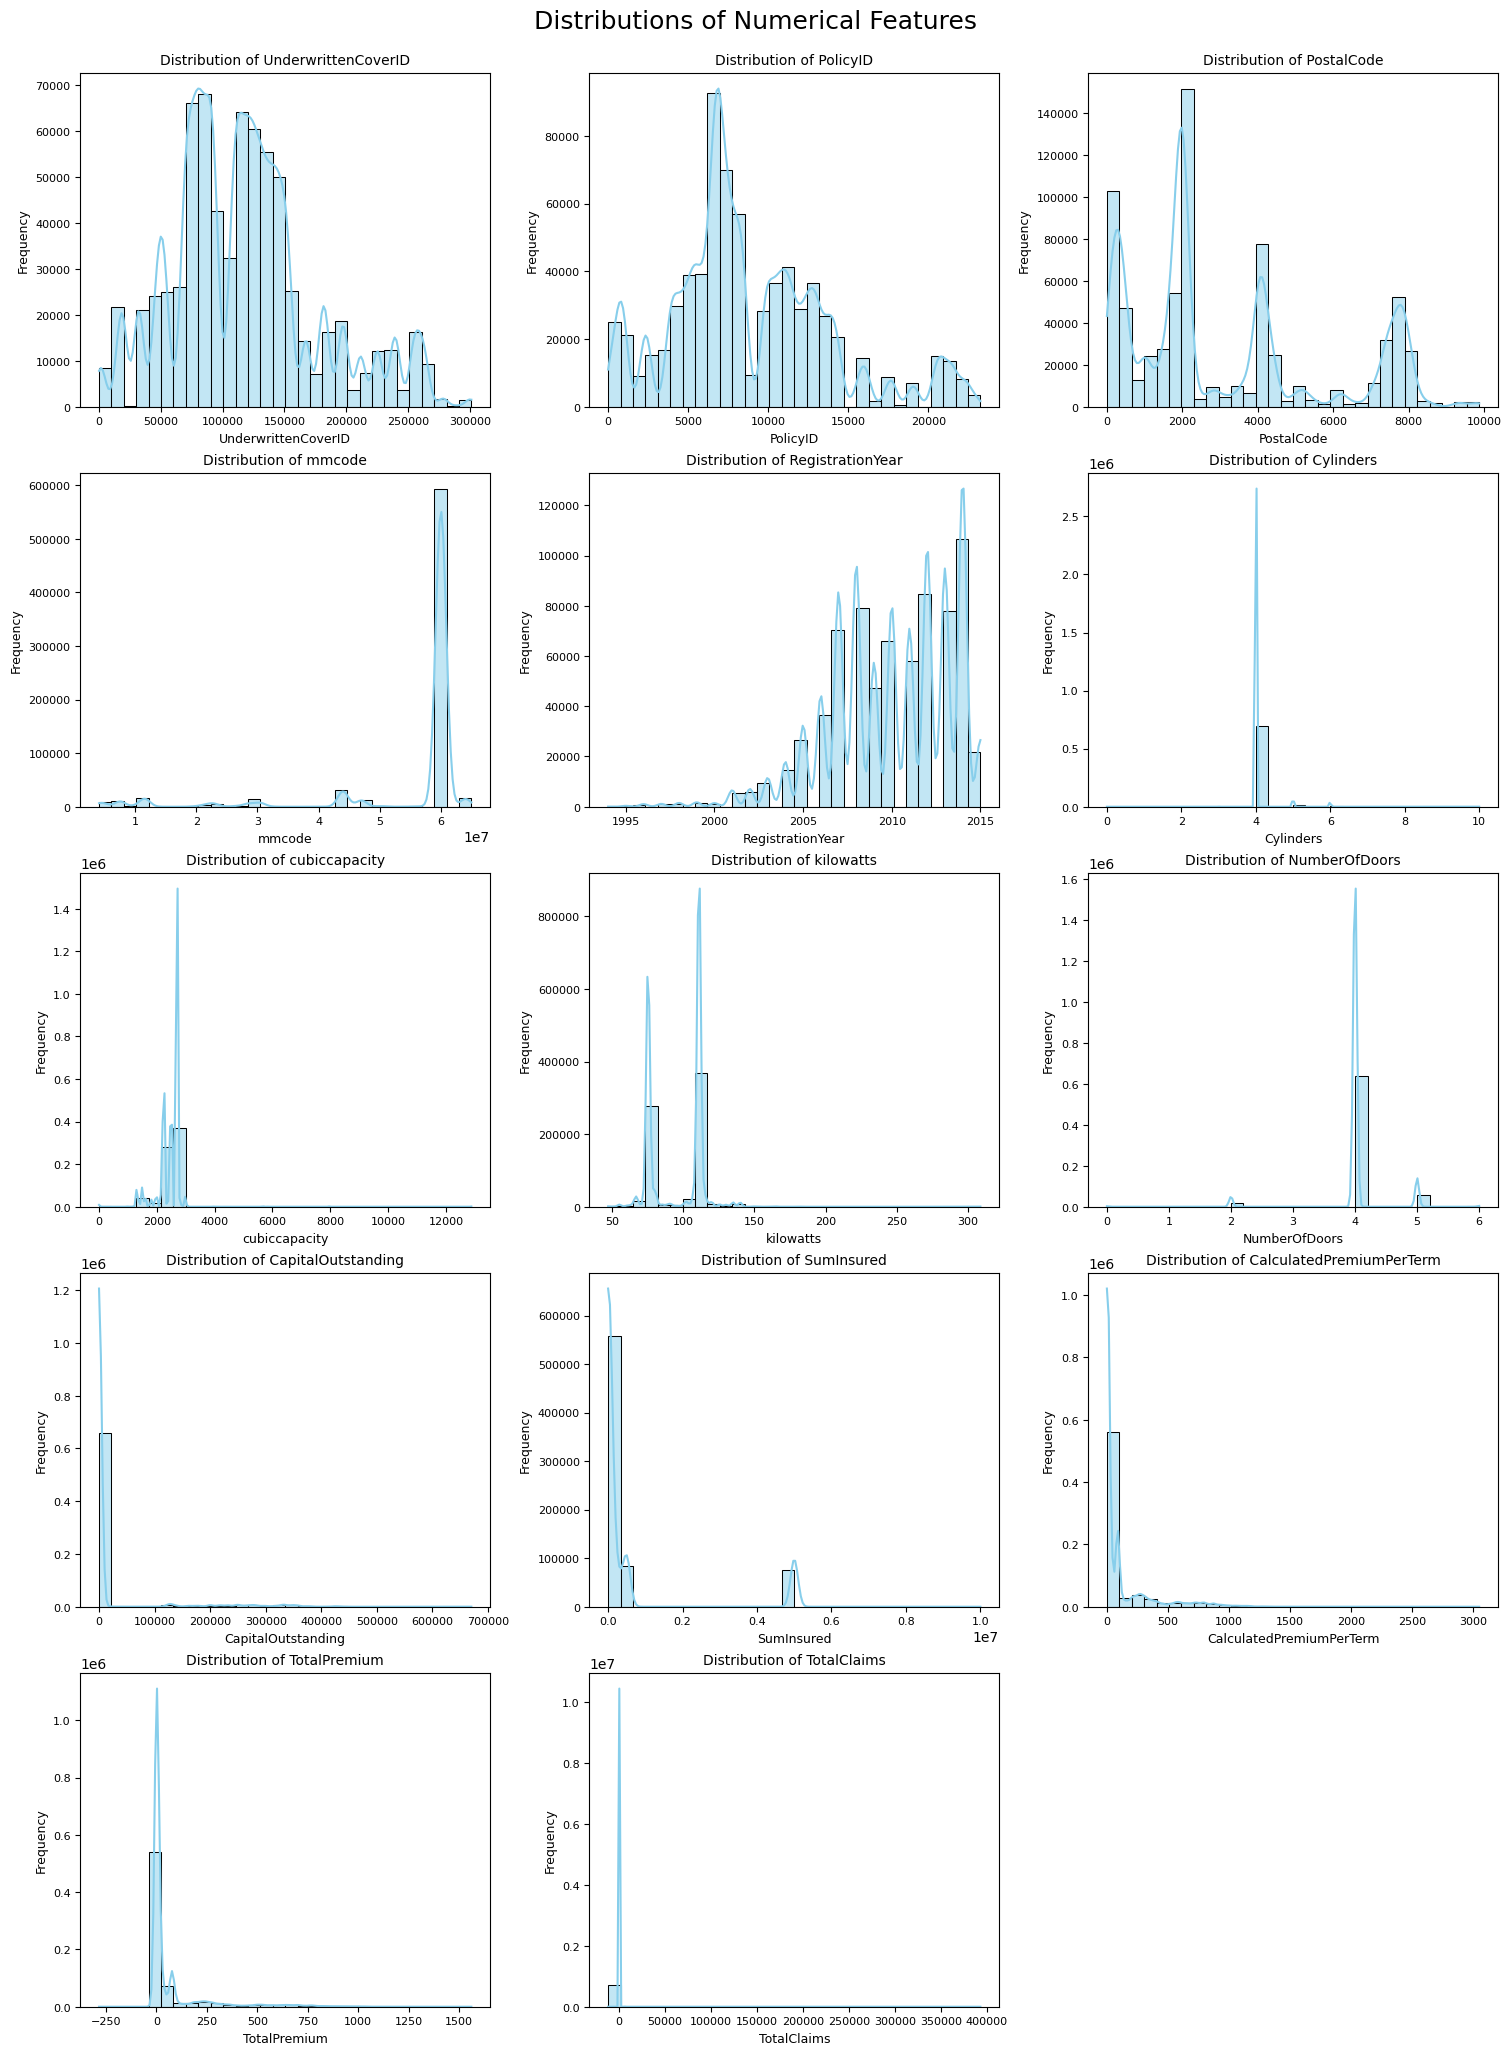

In [12]:
num_cols_per_row = 3
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / num_cols_per_row)

# --- 2. Create the Figure and a Grid of Subplots (Axes) ---
fig, axes = plt.subplots(num_rows, num_cols_per_row,
                         figsize=(num_cols_per_row * 5, num_rows * 4), # Adjust figsize to your preference
                         constrained_layout=True) # Essential for tight spacing
if num_rows == 1 and num_cols_per_row == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# --- 4. Iterate Through Columns and Plot Distributions ---
print("Generating numerical distribution plots...")
for i, col in enumerate(numerical_columns):
    current_ax = axes[i] # Get the current axis object for plotting

    sns.histplot(Insurance_df[col], kde=True, color='skyblue', bins=30, ax=current_ax)

    # Set titles and labels for the current subplot
    current_ax.set_title(f'Distribution of {col}', fontsize=10)
    current_ax.set_xlabel(col, fontsize=9)
    current_ax.set_ylabel('Frequency', fontsize=9)

    # Adjust tick label sizes for better readability in subplots
    current_ax.tick_params(axis='x', labelsize=8)
    current_ax.tick_params(axis='y', labelsize=8)

# --- 5. Hide Any Unused Subplots ---
# If the number of plots doesn't perfectly fill the grid, remove the empty ones
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# --- 6. Add a Main Title for the Entire Figure ---
plt.suptitle('Distributions of Numerical Features', fontsize=18, y=1.02) # y adjusts vertical position

# --- 7. Display the Plots ---
plt.show()

**Correlation Analysis**

<Axes: xlabel='TransactionMonth', ylabel='TotalPremium'>

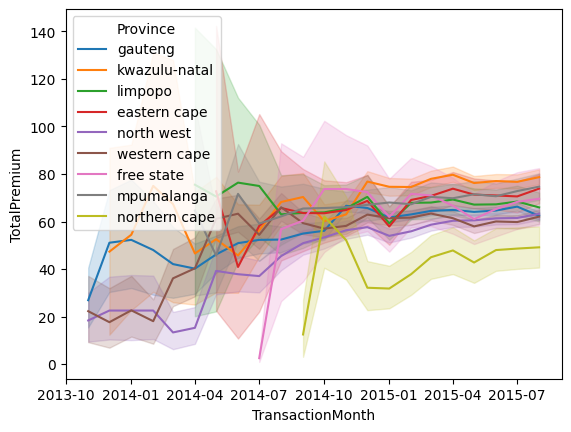

In [20]:
# Relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode
sns.lineplot(data=Insurance_df, x='TransactionMonth', y='TotalPremium', hue='Province')


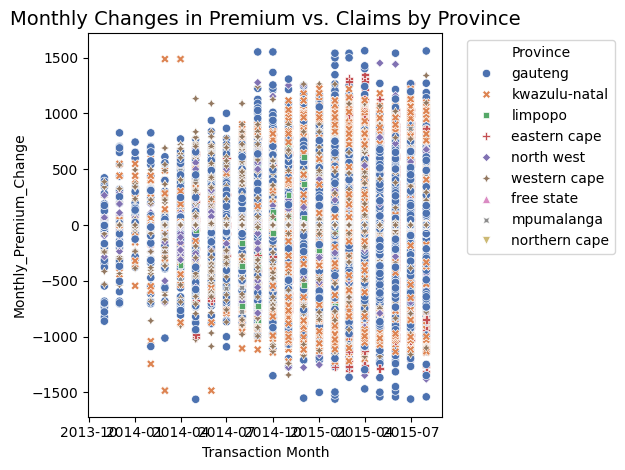

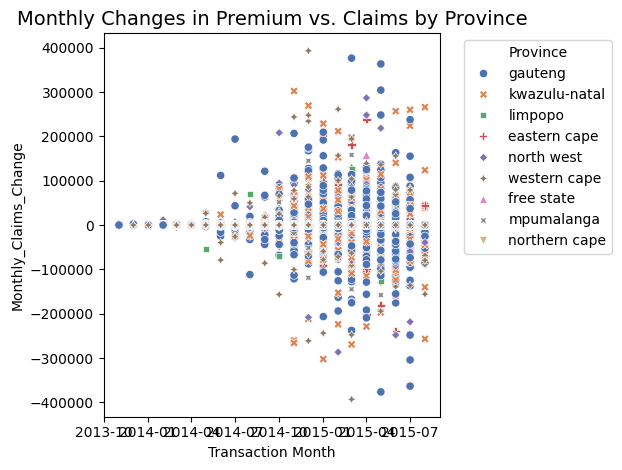

In [32]:
# Calculate monthly changes grouped by ZipCode
Insurance_df['Monthly_Premium_Change'] = Insurance_df.groupby('Province')['TotalPremium'].diff()
Insurance_df['Monthly_Claims_Change'] = Insurance_df.groupby('Province')['TotalClaims'].diff()

monthly_changes_df = Insurance_df.dropna(subset=['Monthly_Premium_Change', 'Monthly_Claims_Change']).copy()
for col in ['Monthly_Premium_Change', 'Monthly_Claims_Change']:
    g=sns.scatterplot(
    data=monthly_changes_df,
    x='TransactionMonth',
    y=col,hue='Province',
    style='Province',
    palette='deep') # Use a deep palette for better visibility
    g.set_xlabel('Transaction Month')
    g.set_ylabel(col)
    g.set_title('Monthly Changes in Premium vs. Claims by Province', fontsize=14)
    plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()